In [1]:
import sys
import os

# add the main directory to the notebook
sys.path.append(os.path.abspath(os.path.join('..')))

from models.QCNN_circuit import QCNN
from data.data import data_load_and_process
import models.utils.embedding
import matplotlib.pyplot as plt
import numpy as np
from training.Training import circuit_training
from benchmarking.Benchmarking import accuracy_test, round_predictions_f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Training Report: 
1. We try to train the model with quark-gluon dataset using U2_equiv conv filter, the img16x16x1 feature reduction, lr =0.05, 
trained_params_U2_equiv = tensor([ 1.07068233,  0.71786919, -0.15085378, -1.42208185, -0.09506549,
         1.2021598 ,  1.91505529,  0.13591835,  0.08515717, -0.42666135,
         0.22734017, -1.22477317,  1.51155726, -0.15824551,  0.11441324,
        -0.6994272 , -0.50485984,  0.65613417, -1.40637032, -0.21798186,
         0.33703348, -0.49479154, -1.02263123,  0.90521976, -1.53827411,
         0.38344819, -0.27030425], requires_grad=True)


accuracy = 0.554


2. We can try to train the quark-gluon dataset using Equivariant_Amplitude and Angle embedding. But there is a problem when we are using Amplitude embedding with resize256.


We are getting the same prediction for all the values. There is an error. 

I should get back to the last version that works well 



In [19]:
"""
Here are possible combinations of benchmarking user could try.
Unitaries: ['U_TTN', 'U2_equiv', 'U4_equiv', 'U_5', 'U_6', 'U_9', 'U_13', 'U_14', 'U_15', 'U_SO4', 'U_SU4', 'U_SU4_no_pooling', 'U_SU4_1D', 'U_9_1D']
U_num_params: [2, 6, 6, 10, 10, 2, 6, 6, 4, 6, 15, 15, 15, 2]
feature_reduction: ['img16x16x1','resize256', 'pca8']
embedding_type: ["Equivariant-Amplitude", "Amplitude", "Angle"]
dataset: 'mnist' or 'fashion_mnist' or "quark_gluon"
circuit: 'QCNN' 
cost_fn: 'mse' or 'cross_entropy'
Note: when using 'mse' as cost_fn binary="True" is recommended, when using 'cross_entropy' as cost_fn must be binary="False".
"""

# invariant testings

# U2_equiv is invariant under p4m using MSE
# U2_equiv is invariant under reflections over X using cross_entropy 


params = np.random.random(40)
U_params = 6
U = "U2_equiv"
feature_reduction = "pca8"
embedding_type = "Angle"
circuit = "QCNN"
cost_fn = "mse"
binary = True
dataset = "quark_gluon"

X_train, X_test, Y_train, Y_test = data_load_and_process(dataset, [1,0], feature_reduction, binary)

#1 for quark, #-1 (0) for gluon
print(X_train.shape)

(40000, 8)


In [20]:
X_train[0]


array([1.85157802, 1.5673359 , 1.35381089, 1.38656188, 1.43850926,
       1.43548184, 1.42577203, 1.43080906])

In [23]:
loss_history, train_acc_history, trained_params = circuit_training(X_train, Y_train, U, U_params, embedding_type, circuit, cost_fn, steps=20, initial_learning_rate=0.05, batch_size=128, decay_factor=0.5, decay_steps=10)

iteration:  0  cost:  1.0231330465869386 train_accuracy: 0.484375
iteration:  1  cost:  1.0000542311067888 train_accuracy: 0.5078125
iteration:  2  cost:  1.0000378943542898 train_accuracy: 0.4921875
iteration:  3  cost:  1.0013951558513807 train_accuracy: 0.484375
iteration:  4  cost:  0.9990755637360544 train_accuracy: 0.46875
iteration:  5  cost:  0.9973820185997215 train_accuracy: 0.4765625
iteration:  6  cost:  0.9987205507304128 train_accuracy: 0.4765625
iteration:  7  cost:  0.9987048531984141 train_accuracy: 0.4765625
iteration:  8  cost:  1.0185377540144507 train_accuracy: 0.484375
iteration:  9  cost:  1.000117379500136 train_accuracy: 0.46875
Learning rate reduced to: 0.025
iteration:  10  cost:  1.000051723954842 train_accuracy: 0.46875
iteration:  11  cost:  0.9989011028824009 train_accuracy: 0.4765625
iteration:  12  cost:  0.9996731515158249 train_accuracy: 0.4765625
iteration:  13  cost:  0.9985478850240873 train_accuracy: 0.4765625
iteration:  14  cost:  0.997249415422

 Output for Original Image: 0.16475418867717825
 Output for Image Reflected over Y-axis: 0.16475418867717825
 Output for Image Reflected over X-axis: 0.16475418867717825
 Output for Image Rotated 90 Degrees: 0.16475418867717825
1


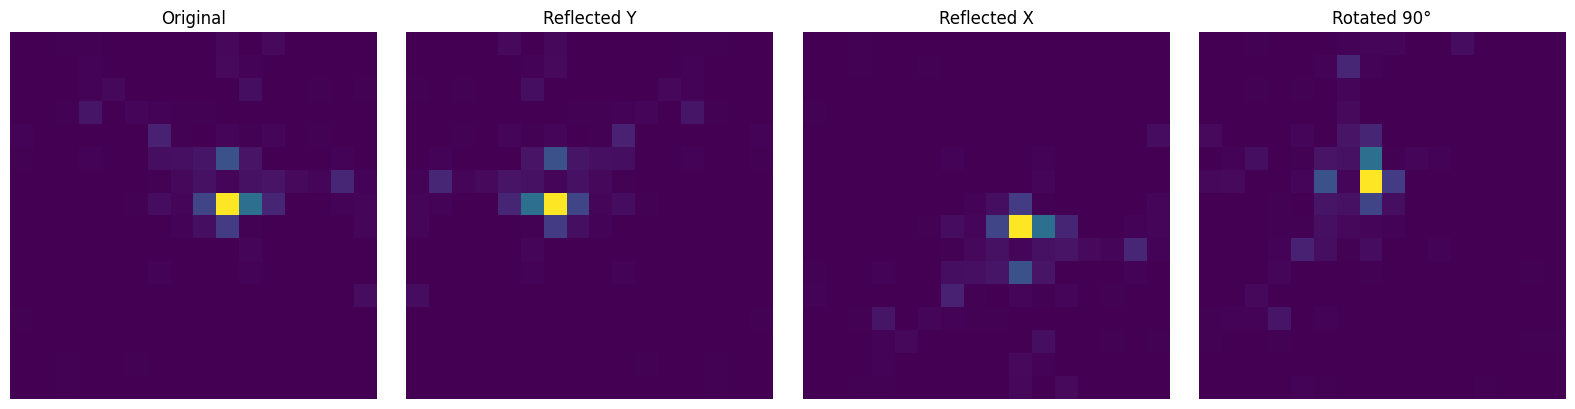

In [15]:
#data and transformed data
matrix = np.array(X_train[1])
matrix_reflected_y = np.fliplr(matrix) # Image Reflected over Y-axis
matrix_reflected_x = np.flipud(matrix) # Image Reflected over X-axis
matrix_rotated_90 = np.rot90(matrix) # Image rotated 90 degrees


result1 = QCNN(matrix, trained_params, U, U_params, feature_reduction, cost_fn)
result2 = QCNN(matrix_reflected_y, trained_params,U, U_params, feature_reduction, cost_fn)
result3 = QCNN(matrix_reflected_x, trained_params, U, U_params, feature_reduction, cost_fn)
result4 = QCNN(matrix_rotated_90, trained_params, U, U_params, feature_reduction, cost_fn)

print(f" Output for Original Image: {result1}")
print(f" Output for Image Reflected over Y-axis: {result2}")
print(f" Output for Image Reflected over X-axis: {result3}")
print(f" Output for Image Rotated 90 Degrees: {result4}")


print(Y_train[1])
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(matrix)
plt.axis('off')  

plt.subplot(1, 4, 2)
plt.title('Reflected Y')
plt.imshow(matrix_reflected_y)
plt.axis('off') 

plt.subplot(1, 4, 3)
plt.title('Reflected X')
plt.imshow(matrix_reflected_x)
plt.axis('off')  

plt.subplot(1, 4, 4)
plt.title('Rotated 90°')
plt.imshow(matrix_rotated_90)
plt.axis('off') 

plt.tight_layout()  
plt.show()



In [24]:
predictions = [QCNN(x, trained_params, U, U_params, embedding_type, cost_fn) for x in X_test[:2000]]

accuracy = accuracy_test(predictions, Y_test[:2000], cost_fn, binary)
accuracy

0.493

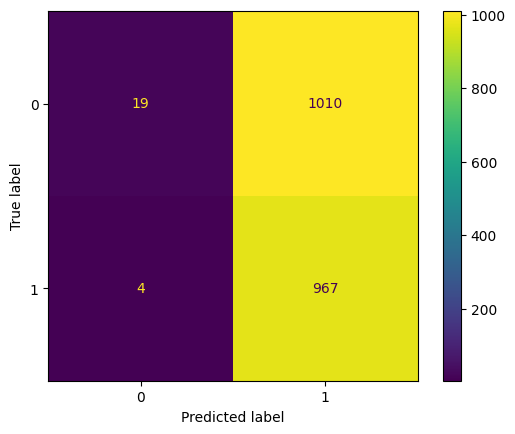

In [25]:
round_predictions = round_predictions_f(predictions, cost_fn)

cm = confusion_matrix(Y_test[:2000], round_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

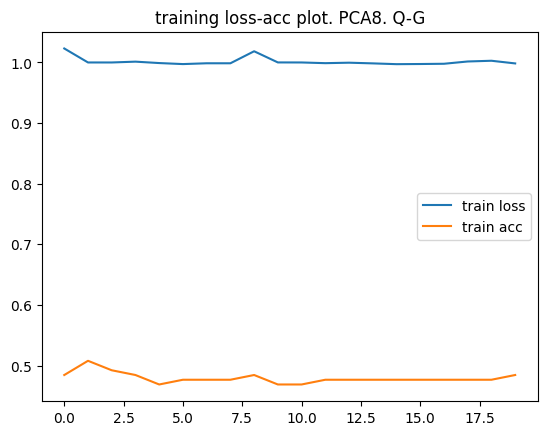

In [27]:
plt.plot(loss_history, label = "train loss")
plt.plot(train_acc_history, label = "train acc")
plt.title("training loss-acc plot. PCA8. Q-G")
plt.yscale("linear")
plt.legend()
plt.show()